# Stock Kelly Fraction Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2020-01-01' #input
end = '2023-01-01' #input
symbol = 'ICICIBANK.NS' #input

In [3]:
stocks = yf.download(symbol, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
stocks_returns = stocks.pct_change().dropna()

In [5]:
def kelly_fraction(stock_returns):
    # returns = np.array(stock_returns)
    wins = stock_returns[stock_returns > 0]
    losses = stock_returns[stock_returns <= 0]
    W = len(wins) / len(stock_returns)
    R = np.mean(wins) / np.abs(np.mean(losses))
    kelly_f = W - ( (1 - W) / R )
    return kelly_f

Text(0, 0.5, 'Kelly Fraction')

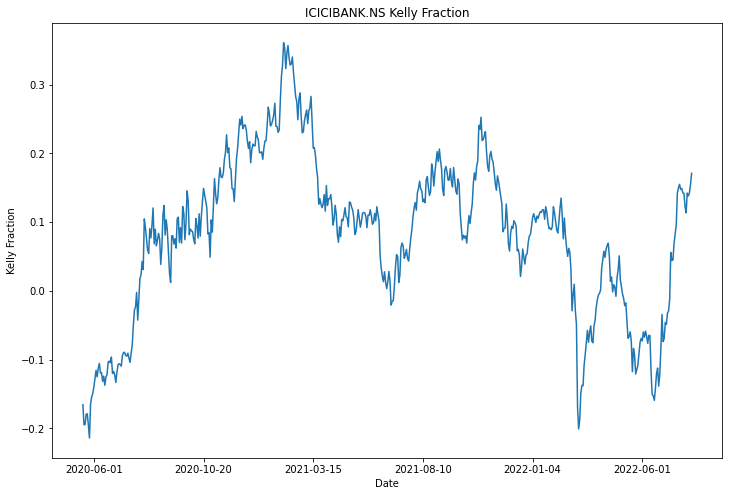

In [6]:
# Compute the running Kelly Fraction
running = [kelly_fraction(stocks_returns[i-90:i]) for i in range(90, len(stocks_returns))]

# Plot running Kelly Fraction up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(stocks_returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([stocks.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol + ' Kelly Fraction')
plt.xlabel('Date')
plt.ylabel('Kelly Fraction')

In [7]:
kf = kelly_fraction(stocks_returns)
kf

0.060289424893697985

In [8]:
running

[-0.16546907056132132,
 -0.194542524613796,
 -0.1945838946776416,
 -0.17932953264434864,
 -0.17883417623744985,
 -0.1950704187166249,
 -0.21400821889624033,
 -0.16476891926561038,
 -0.15441689582547607,
 -0.1492076344418981,
 -0.13989203215578538,
 -0.12810672548647417,
 -0.11553351482656227,
 -0.1250661860285024,
 -0.11238954769547349,
 -0.10541617866334385,
 -0.11932793357495208,
 -0.1188085687952738,
 -0.1316311073463301,
 -0.12398340743755365,
 -0.1372659164155441,
 -0.12543652126872462,
 -0.12193937733242477,
 -0.10387279262639004,
 -0.10212301179432637,
 -0.10449034992977602,
 -0.09623320994205886,
 -0.12017775193250313,
 -0.11712753467408277,
 -0.12159886154199895,
 -0.13328716158599208,
 -0.11936713173711389,
 -0.10747122737115888,
 -0.10588629347346623,
 -0.10745720982709983,
 -0.10932285281354193,
 -0.09435146667677363,
 -0.08994962875408397,
 -0.08924167817850448,
 -0.09394670123029636,
 -0.0949293594562981,
 -0.09057361334676817,
 -0.0976953461977923,
 -0.10397610533509749,